basic classification of fashion articles
https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/teno/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/teno/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


1.10.0


Download the dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Show the images..

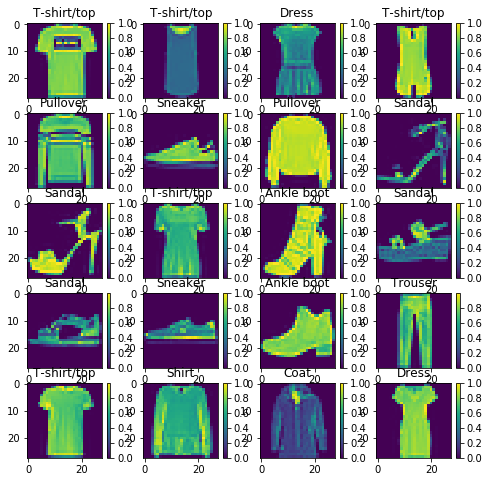

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(class_names[train_labels[i]])
    plt.colorbar()
plt.show()

Change to greyscale

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

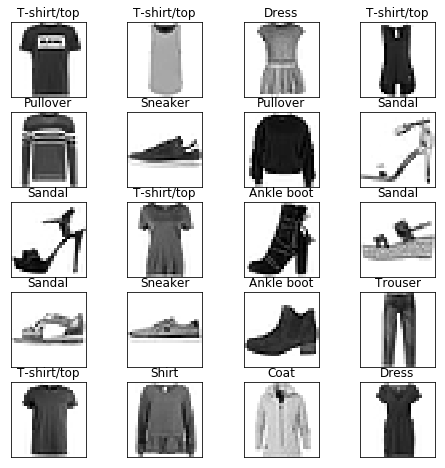

In [26]:
plt.figure(figsize=(8,8))
for i in range(1, columns*rows +1):
    plt.subplot(rows, columns, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])

Flatten the images 2D to array, then a relu layer then a softmax layer to the probs of the 10 classes

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.4932 - acc: 0.8277
Epoch 2/5
60000/60000 [==============================] - 13s 221us/step - loss: 0.3737 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.3348 - acc: 0.8792
Epoch 4/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.3097 - acc: 0.8874
Epoch 5/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.2937 - acc: 0.8927


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 88us/step
Test accuracy: 0.8757


In [33]:
predictions = model.predict(test_images)

In [40]:
"Most likely class is: {0}".format(class_names[np.argmax(predictions[0])])

'Most likely class is: Ankle boot'

In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

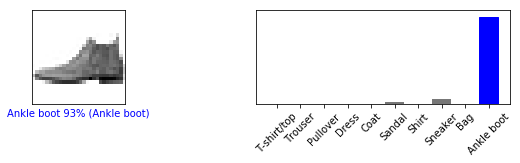

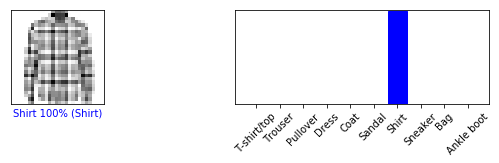

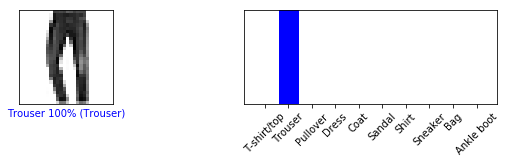

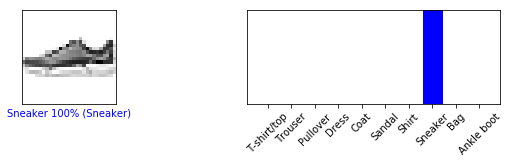

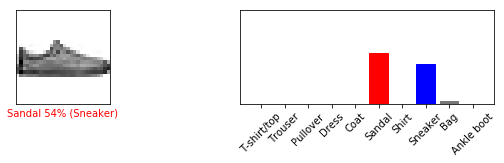

In [62]:
imgs = [0,7,5,9,12]
for i in range(len(imgs)):
    plt.figure(figsize=(10,10))
    plt.subplot(len(imgs),2,i*2+1)
    plot_image(imgs[i], predictions, test_labels, test_images)
    plt.subplot(len(imgs),2,i*2+2)
    plot_value_array(imgs[i], predictions,  test_labels)
    plt.xticks(range(10), class_names, rotation=45)